# Overfitting when training data is limited.

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.losses as losses
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.datasets as datasets

import numpy as np
import matplotlib.pyplot as pl

# A small training data set

Load the MNIST dataset.

1. Rescaling the input values to 0-1 from 0-255.


2. Reduce the training data to only 100 images.

  - we have approximately 10 images per digit.

In [3]:
(data_train, data_test) = tf.keras.datasets.mnist.load_data(path='/data/shared/datasets/mnist.npz')

x_train, y_train = data_train
x_test, y_test = data_test

x_train = x_train / 255
x_test = x_test / 255

x_train.shape

(60000, 28, 28)

In [4]:
N = x_train.shape[0]
N_train = 100

I = np.arange(N)
np.random.shuffle(I)
I = I[:N_train]

x_train = x_train[I,:,:]
y_train = y_train[I]

In [5]:
x_train.shape, y_train.shape

((100, 28, 28), (100,))

# Building the model

We are going to build a three layer dense model, with inner layer having `relu` activation, and the outer layer using `softmax`.

In [6]:
model = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((-1,)),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.save_weights('model_weights_init.h5')
model.compile(
    loss=losses.SparseCategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=['acc']
)

# Training and Testing

We will use `model.fit` with 10 epochs.

We also make sure to always start from the initial random model parameters.

In [14]:
#
# Always starts from the initial weights for reproducibility
#
model.load_weights('model_weights_init.h5')

log = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 3ms/step - loss: 2.2793 - acc: 0.1800
Epoch 2/20
4/4 [==============================] - 0s 3ms/step - loss: 2.1956 - acc: 0.3200
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 2.0771 - acc: 0.4100
Epoch 4/20
4/4 [==============================] - 0s 3ms/step - loss: 1.9278 - acc: 0.4300
Epoch 5/20
4/4 [==============================] - 0s 3ms/step - loss: 1.7312 - acc: 0.6000
Epoch 6/20
4/4 [==============================] - 0s 3ms/step - loss: 1.4952 - acc: 0.7400
Epoch 7/20
4/4 [==============================] - 0s 11ms/step - loss: 1.2424 - acc: 0.7500
Epoch 8/20
4/4 [==============================] - 0s 3ms/step - loss: 0.9673 - acc: 0.8700
Epoch 9/20
4/4 [==============================] - 0s 3ms/step - loss: 0.7181 - acc: 0.8900
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 0.5325 - acc: 0.9000
Epoch 11/20
4/4 [==============================] - 0s 3ms/step - loss: 0.4162 - acc: 0.9

Let's **deploy** the model, and see how well it works using the test data.

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.8131 - acc: 0.7369


## Overfitting

Overfitting occurs when the model is sufficiently large to capture the training data over optimistically.  It fails to account the unobserved
inputs during deployment.

This results in unreasonally good training accuracy, and does not accurately reflect the true quality of the model

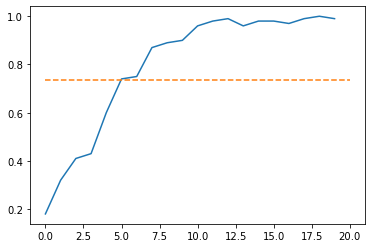

In [18]:
pl.plot(log.history['acc'])
pl.plot([0, 20], [test_acc, test_acc], '--');

# Training with cross-validation

Retrain the same model

1. Reload the model parameters.

2. Specify a validation split.

In [19]:
model.load_weights('model_weights_init.h5')

log = model.fit(x_train, y_train, epochs=20, validation_split=0.1, verbose=2)

Epoch 1/20
3/3 - 0s - loss: 2.2935 - acc: 0.1222 - val_loss: 2.2252 - val_acc: 0.2000
Epoch 2/20
3/3 - 0s - loss: 2.2548 - acc: 0.1778 - val_loss: 2.1842 - val_acc: 0.3000
Epoch 3/20
3/3 - 0s - loss: 2.1990 - acc: 0.2333 - val_loss: 2.1337 - val_acc: 0.4000
Epoch 4/20
3/3 - 0s - loss: 2.1321 - acc: 0.3111 - val_loss: 2.0806 - val_acc: 0.4000
Epoch 5/20
3/3 - 0s - loss: 2.0608 - acc: 0.3556 - val_loss: 2.0125 - val_acc: 0.4000
Epoch 6/20
3/3 - 0s - loss: 1.9771 - acc: 0.4667 - val_loss: 1.9260 - val_acc: 0.4000
Epoch 7/20
3/3 - 0s - loss: 1.8830 - acc: 0.5556 - val_loss: 1.8247 - val_acc: 0.5000
Epoch 8/20
3/3 - 0s - loss: 1.7725 - acc: 0.6556 - val_loss: 1.7113 - val_acc: 0.6000
Epoch 9/20
3/3 - 0s - loss: 1.6506 - acc: 0.6889 - val_loss: 1.5836 - val_acc: 0.6000
Epoch 10/20
3/3 - 0s - loss: 1.5048 - acc: 0.7222 - val_loss: 1.4601 - val_acc: 0.6000
Epoch 11/20
3/3 - 0s - loss: 1.3463 - acc: 0.8111 - val_loss: 1.3407 - val_acc: 0.6000
Epoch 12/20
3/3 - 0s - loss: 1.1697 - acc: 0.8556 - 

Plot the training *loss*.

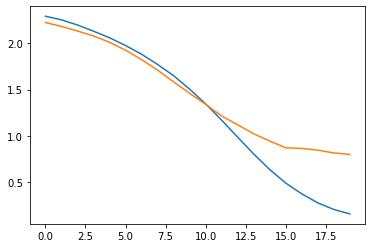

In [21]:
pl.plot(log.history['loss'])
pl.plot(log.history['val_loss'])

Compare

- Training accuracy

- Cross-validation accuracy

- Test accuracy

In [22]:
[test_loss, test_acc] = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.8467 - acc: 0.7344


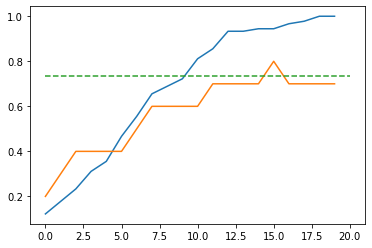

In [24]:
pl.plot(log.history['acc'])
pl.plot(log.history['val_acc'])
pl.plot([0, 20], [test_acc, test_acc], '--')

# Model Parameter Regulation

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


Examine the distribution of the model parameters

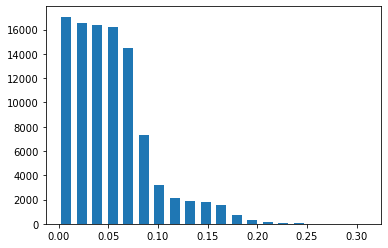

In [34]:
w = np.concatenate([weight.reshape(-1) for weight in model.get_weights()])
(counts0, bins0) = np.histogram(np.abs(w), bins=20)
centers0 = (bins0[:-1] + bins0[1:]) / 2
pl.bar(centers0, counts0, width=0.01);

# Kernel Regulation

Let's rebuild the model, but for each dense layer, specify a loss for its parameters.

In [67]:
import tensorflow.keras.regularizers as regularizers

l1 = regularizers.l2(1e-2)

model2 = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((-1,)),
    layers.Dense(100, activation='relu', kernel_regularizer=l1),
    layers.Dense(100, activation='relu', kernel_regularizer=l1),
    layers.Dense(100, activation='relu', kernel_regularizer=l1),
    layers.Dense(10, activation='softmax')
])

model2.compile(
    loss=losses.SparseCategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=['acc']
)

model2.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_15 (Reshape)         (None, 784)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_61 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_62 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_63 (Dense)             (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


# Training of regularized model

Initialize the model with the same initial weights as before.

In [68]:
model2.load_weights('./model_weights_init.h5')
log = model2.fit(x_train, y_train, validation_split=0.2, epochs=20, verbose=2)

Epoch 1/20
3/3 - 1s - loss: 6.0117 - acc: 0.1500 - val_loss: 5.7753 - val_acc: 0.3000
Epoch 2/20
3/3 - 0s - loss: 5.6674 - acc: 0.3375 - val_loss: 5.5319 - val_acc: 0.2500
Epoch 3/20
3/3 - 0s - loss: 5.3612 - acc: 0.4625 - val_loss: 5.2984 - val_acc: 0.3000
Epoch 4/20
3/3 - 0s - loss: 5.0613 - acc: 0.6125 - val_loss: 5.0413 - val_acc: 0.3000
Epoch 5/20
3/3 - 0s - loss: 4.7505 - acc: 0.6625 - val_loss: 4.7765 - val_acc: 0.4000
Epoch 6/20
3/3 - 0s - loss: 4.4287 - acc: 0.7625 - val_loss: 4.5357 - val_acc: 0.5000
Epoch 7/20
3/3 - 0s - loss: 4.1042 - acc: 0.8250 - val_loss: 4.2695 - val_acc: 0.5000
Epoch 8/20
3/3 - 0s - loss: 3.7782 - acc: 0.9125 - val_loss: 4.0493 - val_acc: 0.7000
Epoch 9/20
3/3 - 0s - loss: 3.4833 - acc: 0.9500 - val_loss: 3.8565 - val_acc: 0.6500
Epoch 10/20
3/3 - 0s - loss: 3.2044 - acc: 0.9750 - val_loss: 3.6370 - val_acc: 0.6500
Epoch 11/20
3/3 - 0s - loss: 2.9539 - acc: 0.9625 - val_loss: 3.5098 - val_acc: 0.7000
Epoch 12/20
3/3 - 0s - loss: 2.7625 - acc: 0.9375 - 

Performance of the regularized model

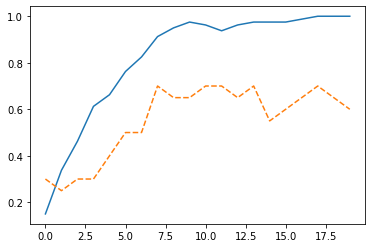

In [69]:
pl.plot(log.history['acc'])
pl.plot(log.history['val_acc'], '--');

Model parameter distribution

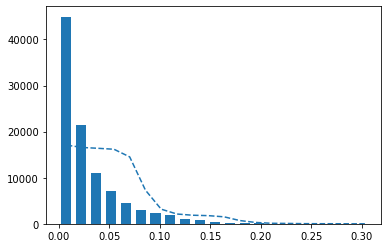

In [71]:
w = np.concatenate([weight.reshape(-1) for weight in model2.get_weights()])
(counts1, bins1) = np.histogram(np.abs(w), bins=20)
centers1 = (bins1[:-1] + bins1[1:]) / 2
pl.bar(centers1, counts1, width=0.01);
pl.plot(centers0, counts0, '--')

# Model with Dropout layer

Build a model with dropout layers interleaved between dense layers.

In [72]:
model3 = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((-1,)),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model3.save_weights('m3_weights_init.h5')

model3.compile(
    loss=losses.SparseCategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=['acc'],
)

model3.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_16 (Reshape)         (None, 784)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)             

In [74]:
model3.load_weights('./m3_weights_init.h5')
log = model3.fit(x_train, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
3/3 [==============================] - 1s 117ms/step - loss: 2.3626 - acc: 0.0547 - val_loss: 2.2149 - val_acc: 0.2000
Epoch 2/20
3/3 [==============================] - 0s 23ms/step - loss: 2.2609 - acc: 0.1117 - val_loss: 2.2015 - val_acc: 0.3000
Epoch 3/20
3/3 [==============================] - 0s 23ms/step - loss: 2.2445 - acc: 0.1531 - val_loss: 2.1724 - val_acc: 0.4000
Epoch 4/20
3/3 [==============================] - 0s 22ms/step - loss: 2.1294 - acc: 0.1812 - val_loss: 2.1233 - val_acc: 0.4000
Epoch 5/20
3/3 [==============================] - 0s 23ms/step - loss: 2.1071 - acc: 0.2406 - val_loss: 2.0800 - val_acc: 0.4000
Epoch 6/20
3/3 [==============================] - 0s 22ms/step - loss: 2.0265 - acc: 0.3867 - val_loss: 2.0258 - val_acc: 0.5000
Epoch 7/20
3/3 [==============================] - 0s 23ms/step - loss: 2.0066 - acc: 0.3797 - val_loss: 1.9551 - val_acc: 0.5500
Epoch 8/20
3/3 [==============================] - 0s 23ms/step - loss: 1.8425 - acc: 0.5164 - va

Training accuracy vs validation accuracy of the dropout layered model.

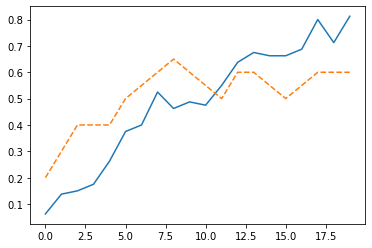

In [75]:
pl.plot(log.history['acc'])
pl.plot(log.history['val_acc'], '--');